In [1]:
import numpy as np
import pandas as pd



ejection_data = pd.read_csv(r"/Users/vsoma_ogh6dsk/ejections.csv")
ejection_data.take(np.arange(-10, -1, 1))
ejection_data


,GAMEID,DATE,DH,EJECTEE,EJECTEENAME,TEAM,JOB,UMPIRE,UMPIRENAME,INNING,REASON
0,CL6188905250,05/25/1889,,orr-d101,Dave Orr,CL6,P,goldf101,Fred Goldsmith,-1,Call at 3B
1,BL2188905280,05/28/1889,,tuckt103,Tommy Tucker,BL2,P,gaffj801,John Gaffney,-1,Yelling at OF chasing fly
2,WS8188906010,06/01/1889,,ewinb101,Buck Ewing,NY1,P,currw101,Wes Curry,-1,Obscene language
3,WS8188907300,07/30/1889,,ewinb101,Buck Ewing,NY1,P,bakep101,Phil Baker,-1,Call at 1B
4,LS2188908100,08/10/1889,,raymh101,Harry Raymond,LS2,P,goldf101,Fred Goldsmith,-1,Call at 2B
...,...,...,...,...,...,...,...,...,...,...,...
18927,NYN202209270,09/27/2022,,mattd001,Don Mattingly,MIA,M,blakr901,Ryan Blakney,8,Balk calls
18928,NYN202209270,09/27/2022,,bleir001,Richard Bleier,MIA,P,blakr901,Ryan Blakney,8,Balk calls
18929,HOU202209280,09/28/2022,,rojaj001,Josh Rojas,ARI,P,porta901,Alan Porter,6,Called third strike (Threw bat and helmet)
18930,HOU202209280,09/28/2022,,lovut001,Torey Lovullo,ARI,M,porta901,Alan Porter,6,Called third strike


In [2]:
def date_to_year(date):
    return int(date.split("/")[-1])

ejection_data = ejection_data.assign(YEAR = ejection_data.get("DATE").apply(date_to_year))
recent_ejections = ejection_data[ejection_data.get("YEAR") >= 1993]

In [3]:
np.sort(recent_ejections.get("TEAM").unique())

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN',
       'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIA', 'MIL',
       'MIN', 'MON', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SDP',
       'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'], dtype=object)

In [4]:
print("Unique jobs:", recent_ejections.get("JOB").unique())
recent_ejections[recent_ejections.get("JOB") == 'C']

Unique jobs: ['P' 'M' 'C' 'N' 'T']


,GAMEID,DATE,DH,EJECTEE,EJECTEENAME,TEAM,JOB,UMPIRE,UMPIRENAME,INNING,REASON,YEAR
12899,NYN199305080,05/08/1993,,raded103,Doug Rader,FLO,C,ripps901,Steve Rippley,3,Called third strike,1993
12900,BAL199305100,05/10/1993,,easlm001,Mike Easler,BOS,C,garcr901,Rich Garcia,8,Called third strike,1993
12906,COL199305120,05/12/1993,,hassr001,Ron Hassey,COL,C,mcshj901,John McSherry,9,Fighting,1993
12908,COL199305120,05/12/1993,,bondb101,Bobby Bonds,SFN,C,mcshj901,John McSherry,9,Fighting,1993
12912,CAL199305150,05/15/1993,,wathj001,John Wathan,CAL,C,cobld901,Drew Coble,1,Called third strike,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
18879,SLN202208070,08/07/2022,,blakm801,Matt Blake,NYA,C,carav901,Vic Carapazza,5,Balls and strikes,2022
18886,SFN202208160,08/16/2022,,banij001,Jeff Banister,ARI,C,blasc901,Cory Blaser,9,Balls and strikes,2022
18889,CHA202208180,08/18/2022,,cinta001,Alex Cintron,HOU,C,dejer901,Ramon DeJesus,1,Called third strike,2022
18902,MIL202208270,08/27/2022,,napom001,Mike Napoli,CHN,C,gonzm901,Manny Gonzalez,7,Called third strike,2022


Let's do a text search to determine the reasons that are intentional hit-by-pitches. I went through a number of phrases, and then appended them to the keywords list below.

In [5]:
def reasons_by_phrase(phrase):  
    phrase = phrase.casefold()
    return (recent_ejections[(recent_ejections.get('JOB') == 'P')
                    & (recent_ejections.get('REASON').str.casefold()
                    .str.contains(phrase))].get('REASON').unique())
reasons_by_phrase('Intentional HBP')

array(['Intentional HBP', 'Intentional HBP after warning',
       'Arguing ejections on intentional HBP', 'Arguing intentional HBP'],
      dtype=object)

Now that 

In [6]:
def is_intentional_hbp(reason):
    ''' Returns true if reason indicates hbp caused a pitcher ejection. Looks for keywords in reason that would indicate it'''
    casefold_reason = reason.casefold()
    # After my manual search, I found that all reasons describing intentional hbp ejections contain one of these keywords
    keywords = (
    ["intentional hbp", "intentionally hitting batter",
        "throwing at batter", "threw at batter", \
        "automatic ejection on hbp", "automatic ejection for hbp",
        "throwing behind batter", "hit by pitch after warning, intentional hit by pitch",
        "hit by pitch after previous warnings, hitting batter while under warning",
        "hit batter after warning, intentional hit by pitch"]
            )
    # Sometimes, even if a keyword is there, a hit-by-pitch still isn't intentional. For instance, argued pitcher threw at batter was not by 
    # the pitcher, but usually by the other team. Thus, even though it has a keyword, there is no hit-by-pitch by the ejected player/ managers' team.
    not_keywords = (
        ["arguing", "argued"]
               )
    for not_keyword in not_keywords:
        if not_keyword in casefold_reason:
            return False
    for keyword in keywords:
        if keyword in casefold_reason:
            return True
    return False

# Only look at players' ejections, since only pitcher (and not manager) ejections are being tracked
intentional_hbps = recent_ejections[(recent_ejections.get('JOB') == 'P') 
                                    & (recent_ejections.get('REASON').apply(is_intentional_hbp))]
intentional_hbps = intentional_hbps.drop(columns = ['JOB', 'UMPIRE', 'UMPIRENAME'])
intentional_hbps.get('REASON').unique()


array(['Throwing at batter', 'Intentional HBP',
       'Throwing at batter after warning', 'Throwing behind batter',
       'Automatic ejection for throwing at batter after warning',
       'Automatic ejection for HBP after warning',
       'Intentional HBP after warning',
       'Automatic ejection on HBP after warning',
       'Intentionally throwing at batter', 'Fighting (Threw at batter)',
       'Intentionally hitting batter'], dtype=object)

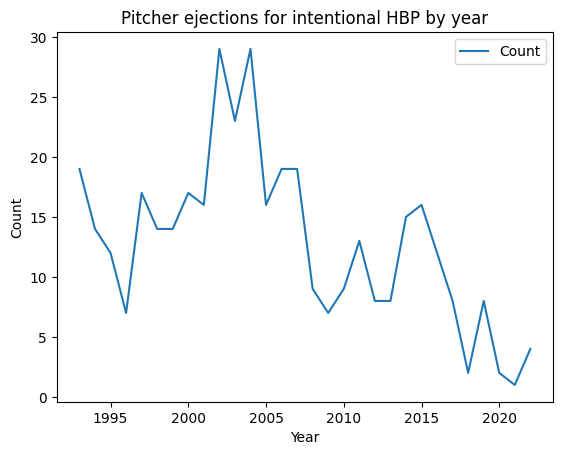

In [7]:

intentional_hbps_by_year = intentional_hbps.groupby('YEAR').count()
intentional_hbps_by_year = intentional_hbps_by_year.assign(Count = intentional_hbps_by_year.get('GAMEID')).get(['Count'])
(
    intentional_hbps_by_year.reset_index().plot(kind = "line", x = "YEAR", y = "Count", 
    xlabel = "Year", ylabel = "Count", title = "Pitcher ejections for intentional HBP by year")
);


In [8]:
intentional_hbps = intentional_hbps.get(['DATE', 'TEAM', 'REASON', 'YEAR'])
intentional_hbps

,DATE,TEAM,REASON,YEAR
12874,04/08/1993,NYA,Throwing at batter,1993
12888,04/27/1993,BOS,Intentional HBP,1993
12949,06/10/1993,LAN,Intentional HBP,1993
12951,06/11/1993,CHN,Intentional HBP,1993
12954,06/11/1993,CHN,Intentional HBP,1993
...,...,...,...,...
18612,05/18/2021,MIN,Throwing at batter,2021
18755,04/08/2022,WAS,Intentionally hitting batter,2022
18757,04/09/2022,CHN,Intentionally hitting batter,2022
18785,05/10/2022,TOR,Intentionally hitting batter,2022


In [9]:
recent_intentional_hbps = intentional_hbps[intentional_hbps.get('YEAR') >= 2008].reset_index().drop(columns = ['index'])
recent_intentional_hbps

,DATE,TEAM,REASON,YEAR
0,05/20/2008,NYA,Throwing at batter,2008
1,06/13/2008,SLN,Intentional HBP,2008
2,07/19/2008,TOR,Intentional HBP,2008
3,07/29/2008,BAL,Intentional HBP,2008
4,07/30/2008,NYA,Throwing at batter,2008
...,...,...,...,...
117,05/18/2021,MIN,Throwing at batter,2021
118,04/08/2022,WAS,Intentionally hitting batter,2022
119,04/09/2022,CHN,Intentionally hitting batter,2022
120,05/10/2022,TOR,Intentionally hitting batter,2022


In [10]:
csv_hbps = recent_intentional_hbps.to_csv()
file_path = 'intentional_hbps.csv'
with open(file_path , 'w') as f:
    f.write(csv_hbps)